# Worksheet 2 - Scientific Visualization MVE080/MMG640
## Colors, proportions, associations and time-series

Name: _Axel Eiman_

This is the second worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

The below loads the packages required for this homework.

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

BASE_HEIGHT = 5
BASE_WIDTH = 7.0

dir_save = "./Figs/"
if not os.path.isdir(dir_save):
    os.mkdir(dir_save)

## Task 1

Read Chapter 4, 10, 11, 12 and 13 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 3 we discussed color palettes for categorical data. Briefly describe and motivate the three key properties we want a good categorical color palette to have.

### Answer 1.1
A color palette for categorical data should feature distinct colors, that are also equivalent - meaning no color should stand out when compared to the rest. They should also be without any sort of percieved order, such as several different brightnesses of the same color.

### Question 1.2

In Lecture 3 we used pie- and bar-charts to visualize proportions. Briefly discuss the benefits and drawbacks with using bar-charts and pie-charts to visualize proportions.

### Answer 1.2
Bar charts are useful for comparing between the proportions of different categories as it is easy to compare the heights of two bars next to each other. This is a drawback of the pie-chart as it is harder to tell which slice is larger if they are similar. An advantage of the pie-chart is that it shows a more encompassing visual of the data proportions as a whole. You can clearly see how much of the whole is taken up by one slice of the pie, if it is a majority for example. This is harder to tell from a side-by-side bar chart. Stacked bars can also be useful when visualizing several sets of proportions or a time series of proportions. 

### Question 1.3

In Lecture 3 we used a mosaic plot to analyses the Titanic data. Now consider Fig. 11.3 in the course book, what are the main takeaways we can read from this visual?

### Answer 1.3
We can see that throughout the different eras, steel has taken over quite assuringly from wood and iron. We can also see by the width of the "mature" era that this is the period when most bridges where constructed, while the other eras are quite similar in terms of amount of bridges constructed.

### Question 1.4

In Lecture 4 we used a bubble chart (see also Fig. 12.3 in the course book). Why is this typically not a good option if we want to identify relationships (e.g. correlated variables) in the data?

### Answer 1.4
It is quite hard to compare the relative scale of the size of two objects. In Fig. 12.3 in the book the dots do not seem to be proportional to the actual measurement either, so the proportional scale between the skull sizes is completely lost in the figure. The bubbles for 28 mm skulls look to have half the diameter of the 30 mm skulls, a third of the 32 mm skulls etc, which makes it hard to grasp the relationship between the data points.

### Question 1.5

Consider Fig. 13.10 in the course book. What is main benefit of a connected scatter plot, and what is important to think about when creating such a visual?

### Answer 1.5
Connected scatter plots can be useful to visualize series of two or more response variables. It is important to indicate what direction the data is going in, whether that be time or something else. Using an appropriate color scale, and indicating important points in the plot can be useful to think about (such as those chosen to explain the cyclic relationship in Fig. 13.10, pointers to a select few months throughout the period).


## Colors 

For this part reading chapter 4 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Colors can be a powerful tool for highlighting. Using the Simpson's paradox data on Canvas make a scatter plot where you highlight category D3 (all other categories can have the same color). Briefly motivate your choice of palette.

C:\Users\ackee\AppData\Local\Temp\ipykernel_384\3176890346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


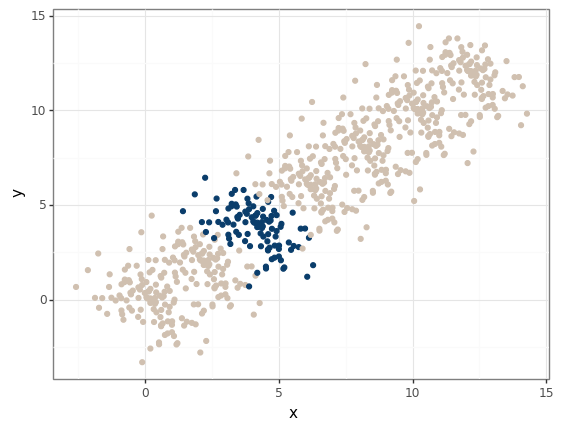

<ggplot: (195465226493)>

In [3]:
# Insert code here 
# Remember to print the visual 
simps = pd.read_csv('Simpson_paradox.csv')

col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]

simps['Highlight'] = "No"
simps['Highlight'][simps['dataset'] == 'D3'] = 'Yes'

p = (ggplot(simps, aes(x='x', y='y'))
+ geom_point(aes(color='Highlight')) 
+ scale_color_manual(values=col_highlight)
+ theme_bw()
+ theme(legend_position='none')
)
p

*Brief motivation*

I decided to use a palette with a "bland" color for the non-highlighted points, and a strong blue for the category D3. This enables us to still clearly see the overall trend of points going upward, by the general shape of all the data points - but with a clear focus on the intended category D3 points that trend negatively.

### Question 2.2 

In Lecture 3 when comparing colormaps (e.g slide 2) I plotted this function;

$$
    z = 0.1 \mathrm{sin}(r) + \mathrm{cos}(r^2) \mathrm{exp}\Big(-\frac{r}{2 \pi} \Big) \ \mathrm{where} \\
    r = x^2 + y^2 \quad x, y \in [-4\pi, 4\pi],
$$

where I used colors to represent $z$. 

Now plot (as in Lecture 3 slide 2) the function

$$
    z = 0.1 \mathrm{sin}(r) + \mathrm{cos}(r^2) \mathrm{exp}\Big(-\frac{x}{4 \pi} \Big) \ \mathrm{where} \\
    r = x^2 + y^2 \quad x, y \in [-4\pi, 4\pi],
$$

using three different [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that are sufficiently distinct. Using three monochrome maps (e.g Greys, Blues and Purples) does not count as sufficiently distinct. Code for how to use the rainbow desaturated colormap is in the Lecture 3 notebook on Canvas.

For each colormap briefly discuss its benefits based on what you can see from the plots you have created.

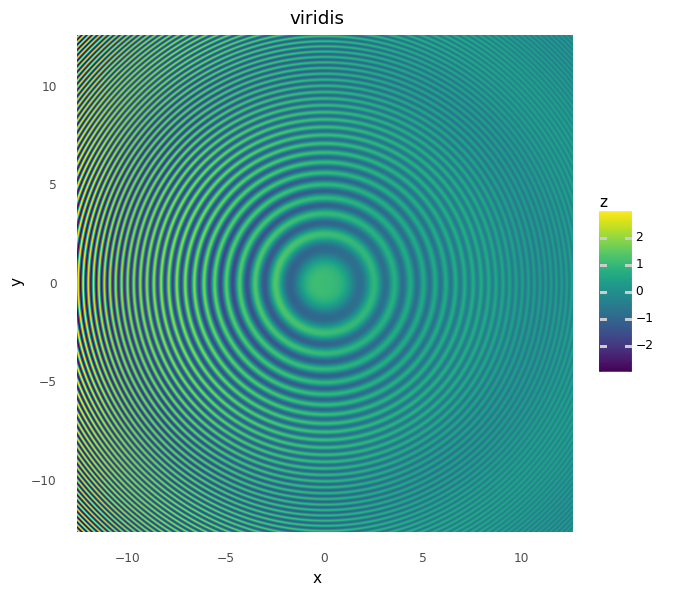

<ggplot: (195465749495)>

In [4]:
# Insert code here for colormap 1
# Remember to print the visual 

funcvals = pd.read_csv('Ex_color_maps-1.csv')
funcvals['z'] = 0.1*np.sin(funcvals['r']) + np.cos(funcvals['r']**2)*np.exp(-funcvals['x']/(4*np.pi))

cmap = 'viridis'

p1 = (ggplot(funcvals, aes(x='x', y='y', fill='z'))
+ geom_raster()
+ scale_fill_cmap(cmap)
+ scale_x_continuous(expand=(0,0))
+ scale_y_continuous(expand=(0,0))
+ labs(title=cmap)
+ theme_minimal()
+ theme(aspect_ratio=1)
)

p1

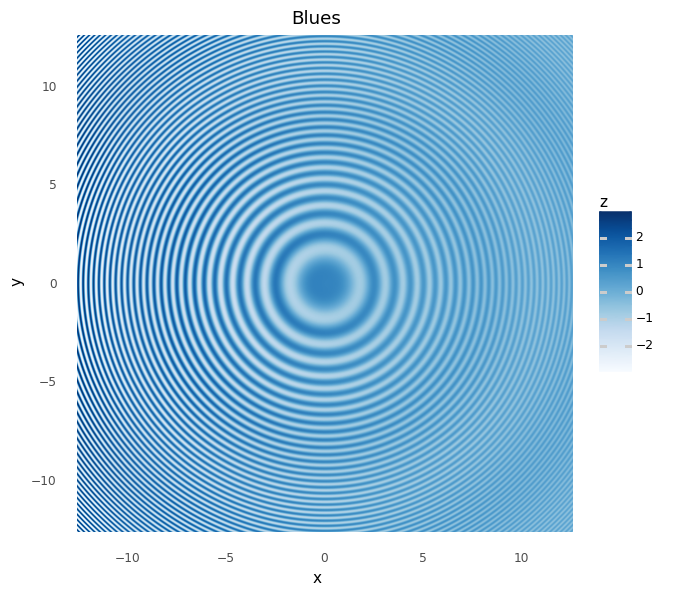

<ggplot: (195470411261)>

In [5]:
# Insert code here for colormap 2
# Remember to print the visual 

cmap = 'Blues'

p2 = (ggplot(funcvals, aes(x='x', y='y', fill='z'))
+ geom_raster()
+ scale_fill_cmap(cmap)
+ scale_x_continuous(expand=(0,0))
+ scale_y_continuous(expand=(0,0))
+ labs(title=cmap)
+ theme_minimal()
+ theme(aspect_ratio=1)
)

p2

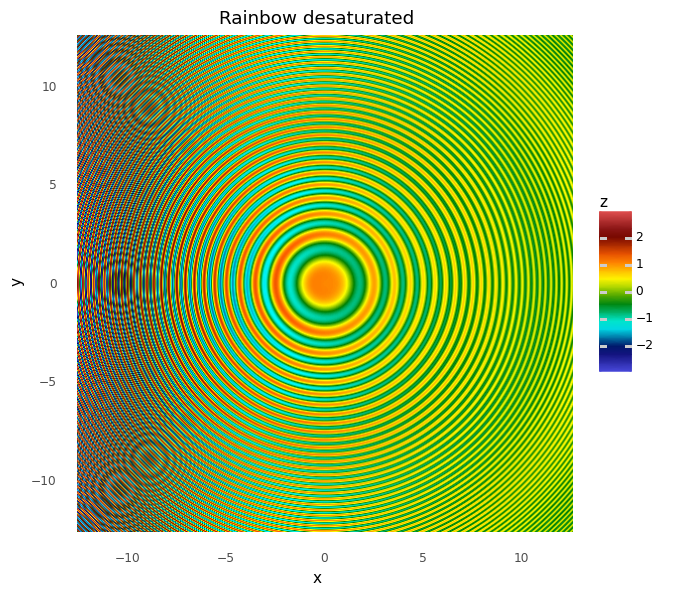

<ggplot: (195465748589)>

In [6]:
# Insert code here for colormap 3
# Remember to print the visual 


col_list_df = pd.read_csv("Rainbow_desaturated.csv")
rainbow_desaturated = []
for i in range(col_list_df.shape[0]):
    rainbow_desaturated.append([col_list_df["R"][i], col_list_df["G"][i], col_list_df["B"][i]])

p3 = (ggplot(funcvals, aes(x='x', y='y', fill='z'))
+ geom_raster()
+ scale_fill_gradientn(colors=rainbow_desaturated)
+ scale_x_continuous(expand=(0,0))
+ scale_y_continuous(expand=(0,0))
+ labs(title='Rainbow desaturated')
+ theme_minimal()
+ theme(aspect_ratio=1)
)

p3

*Brief discussion*

Both the veridis and blue color maps have pretty good feature extraction, we can see variations in both higher and lower frequencies in r (the circles around [0,0]). We can barely see the changes in x due to the exponential term with these colormaps, with it being slightly clearer with veridis to my eyes. Apart from feature extraction, the mapping makes quantitative sense, which the desaturated rainbow mapping does not. It does however beat the other two in terms of feature extraction, showing everything that they do only more clearly. We also see clearly visible waves around other locations that are pretty much completely invisible with the other colormaps.

## Question 2.3

On slide 21 in Lecture 3 (and on Canvas) is a recreation using Swedish data of the famous cover page for the economist climate issue. Using the weather data on Canvas recreate this visual.

**Hint 1**: You can use the following syntax to get the colors correct;

~~~
# Color palette 
color_list = [np.array([103,0,31]) / 256,
              np.array([178,24,43]) / 256, 
              np.array([214,96,77]) / 256, 
              np.array([244,165,130]) / 256, 
              np.array([253,219,199]) / 256, 
              np.array([247,247,247]) / 256, 
              np.array([209,229,240]) / 256, 
              np.array([146,197,222]) / 256, 
              np.array([67,147,195]) / 256, 
              np.array([33,102,172]) / 256, 
              np.array([5,48,97]) / 256]

# Used in the ggplot call 
# [::-1] reverses an array (I entered the color in wrong order :)
    + scale_fill_gradientn(colors=color_list[::-1], name = "Temperature [C]")
~~~


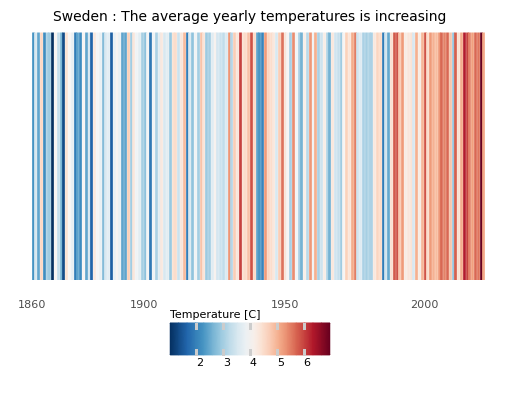

<ggplot: (195466041796)>

In [7]:
# Insert code here 
# Remember to print the visual 

color_list = [np.array([103,0,31]) / 256,
              np.array([178,24,43]) / 256, 
              np.array([214,96,77]) / 256, 
              np.array([244,165,130]) / 256, 
              np.array([253,219,199]) / 256, 
              np.array([247,247,247]) / 256, 
              np.array([209,229,240]) / 256, 
              np.array([146,197,222]) / 256, 
              np.array([67,147,195]) / 256, 
              np.array([33,102,172]) / 256, 
              np.array([5,48,97]) / 256]

weather = pd.read_csv('Weather_avg.csv')

p = (ggplot(weather)
+ geom_vline(aes(xintercept='Year', color='AvgT'), size=1.1)
+ scale_color_gradientn(colors=color_list[::-1], name = "Temperature [C]")
+ scale_x_continuous(breaks=[1860, 1900, 1950, 2000])
+ labs(title='Sweden : The average yearly temperatures is increasing')
+ theme_minimal()
+ theme(
    legend_position='bottom', 
    legend_background=element_blank(),
    aspect_ratio=1/2,
    axis_text=element_text(size=8),
    axis_title=element_text(size=8),
    legend_text=element_text(size=8),
    legend_title=element_text(size=8),
    title=element_text(size=10)
    )
)
p


## Time-series

For this part reading chapter 13 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.



### Question 3.1

In the lecture I showed how we can use points, lines or both to visualize a single time-series. Another way is to use area (Fig. 13.4 in the [course book](https://clauswilke.com/dataviz/)). Using the inflation data (on Canvas) choose a country and visualize its inflation over time using i) dots, ii) lines and iii) line with area shaded under it. Briefly discuss the benefit of also including the area.

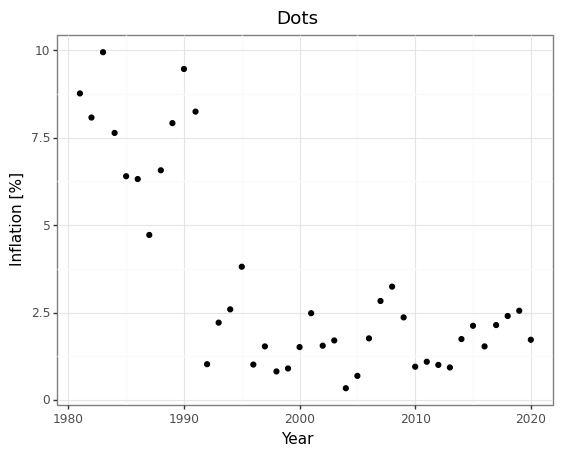

<ggplot: (195472506082)>

In [44]:
# Insert code here for dots
# Remember to print the visual 

infl = pd.read_csv('Inflation_data_homework.csv')

p = (ggplot(infl[infl['country'] == 'Sweden'], aes(x='Year', y='Inflation'))
+ geom_point()
+ labs(title='Dots', y='Inflation [%]')
+ theme_bw()
)
p

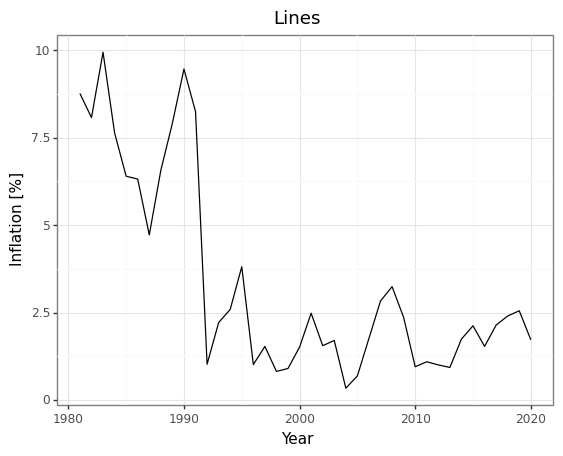

<ggplot: (195472166536)>

In [45]:
# Insert code here for lines
# Remember to print the visual 

p = (ggplot(infl[infl['country'] == 'Sweden'], aes(x='Year', y='Inflation'))
+ geom_line()
+ labs(title='Lines', y='Inflation [%]')
+ theme_bw()
)
p

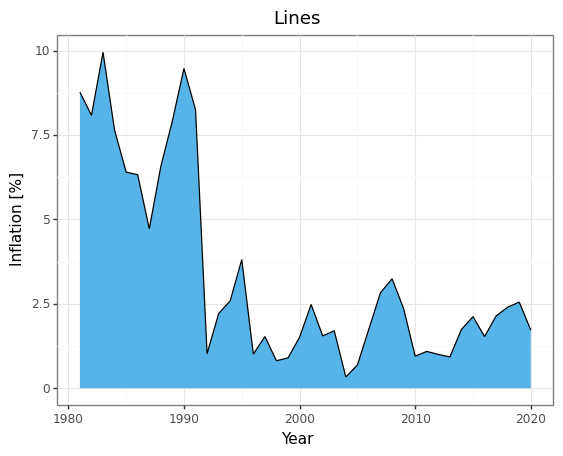

<ggplot: (195472091429)>

In [46]:
# Insert code here for area
# Remember to print the visual 

p = (ggplot(infl[infl['country'] == 'Sweden'], aes(x='Year', y='Inflation'))
+ geom_area(color='black', fill=cbPalette[1])
+ labs(title='Lines', y='Inflation [%]')
+ theme_bw()
)
p

*Brief motivation*
Including the area in the plot gives an indication of how much the value of money actually changed, as more inflation over longer periods mean the value changes more. So since the area is indicative of the effect inflation has on the change in the value of money it is useful to highlight it in the visualization.

### Question 3.2

Using the inflation data choose 7 countries and visualize in a single plot (you are allowed to use facets) their inflation over time. If you have time I would try to plot the data using a you-are-here graphic (slide 9 Lecture 4). 

Briefly motivate your choice of plot.

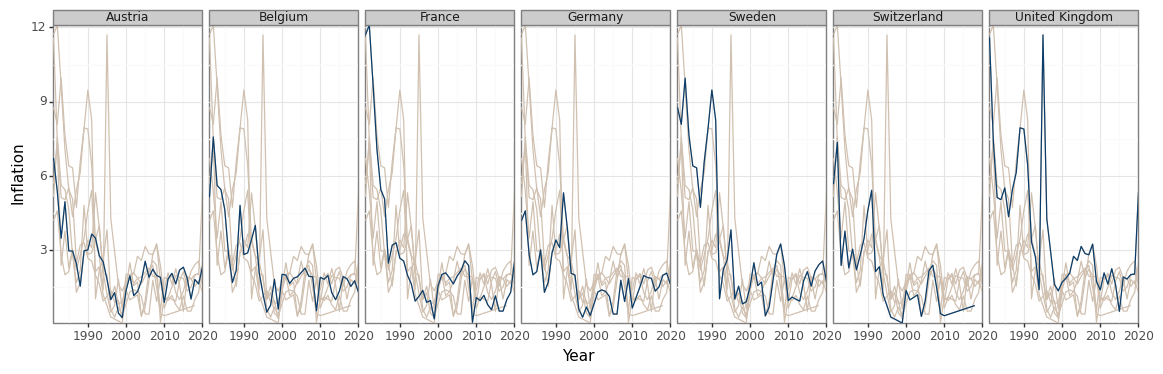

<ggplot: (195475929067)>

In [100]:
# Insert code here 
# Remember to print the visual 

infl_seven = infl.query('country in ["Sweden", "Switzerland", "Austria", "Germany", "Belgium", "United Kingdom", "France"]')

infl_seven_copy = infl_seven.copy()
infl_seven_copy['Cc'] = infl_seven['country']
infl_seven_copy = infl_seven_copy.drop('country', axis=1)

col_highlight = ["#D0C0B0", "#0A3D6B", "#ECE9CD", "#0D5C3D", "#812F02"]
p = (ggplot(infl_seven, aes(x="Year", y="Inflation", color = "highlight")) 
+ geom_line(data=infl_seven_copy, mapping=aes(x='Year', y='Inflation', group='Cc'), color=col_highlight[0])
+ geom_line(aes(group='country'), color=col_highlight[1]) 
+ facet_wrap("~country", nrow=1) 
+ scale_color_manual(values=col_highlight, name = " ")
+ theme_bw()
+ scale_y_continuous(expand = (0, 0))
+ scale_x_continuous(expand = (0, 0))
+ theme(
    figure_size=(14,5),
    legend_position='none',
    aspect_ratio=2
)
)

p

*Brief motivation*

By visualizing inflation through line graphs in this manner, we can easily follow any specific country by looking at the subplot where it is highlighted. In each window we can see the countries own value for what it is on its own, as well as compare it to the other countries. It is too cluttered to let us see exactly which lines correspond to which country in a single plot, but we can easily look around to find what we are looking for. If we are curious to know for example which country had high inflation last, it is quite easy to spot the spike in any graph and quickly find that line highlighted in the plot for the UK.

### Question 3.3 

The connected scatter plot (Fig. 13.10 in the [course book](https://clauswilke.com/dataviz/) is an approach that allows us to visualize two separate time-dependent variables. On the webpage I have uploaded an example for a connected scatter plot where I plot unemployment rate and apartment prices for Sweden from 1996-2020. Use the dataset on Canvas to recreate this visual. Briefly comment what you think is the main takeaway message from the plot. 

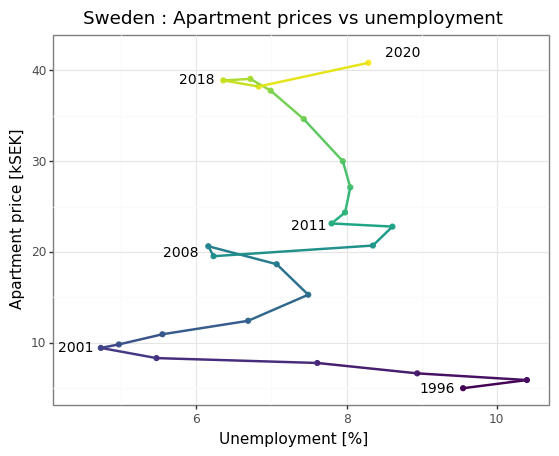

<ggplot: (195474659066)>

In [142]:
# Insert code here 
# Remember to print the visual 

unemployment = pd.read_csv('House_unemployed.csv')
unemployment['price'] /= 1000

p = (ggplot(unemployment, aes(x='Unemployment', y='price', color='Year'))
+ geom_point()
+ geom_path(size=1)
+ theme_bw()
+ annotate("text", x = 9.2, y = 5, label = "1996", size=10.0)
+ annotate("text", x = 4.4, y = 9.5, label = "2001", size=10.0)
+ annotate("text", x = 5.8, y = 20, label = "2008", size=10.0)
+ annotate("text", x = 7.5, y = 23, label = "2011", size=10.0)
+ annotate("text", x = 6, y = 39, label = "2018", size=10.0)
+ annotate("text", x = 8.75, y = 42, label = "2020", size=10.0)
+ labs(x='Unemployment [%]', y='Apartment price [kSEK]', title= 'Sweden : Apartment prices vs unemployment')
+ theme(
    legend_position='none'
)
)
p

*Brief motivation*

The main takeaway message from the plot is that we can see a sort of cyclic pattern where house prices are spiraling upward. We see that house prices have only gone down three times in this period, all around a time when unemployment hits a temporary low before increasing again. 

## Proportions 

For this part reading chapter 10-11 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Consider the Swedish election data from 2010 and 2014 which I have added below. Visualize the data such that it is easy to see, in a single plot, which was the third biggest party in 2010 and 2014.


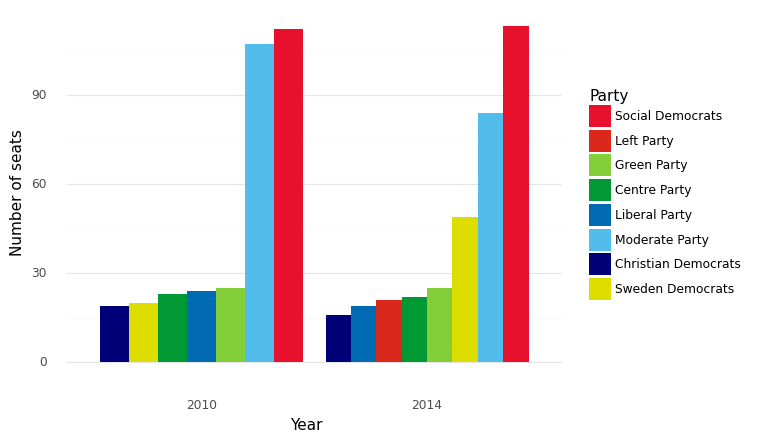

<ggplot: (129134129595)>

In [171]:
swedish_election_2010 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [112, 19, 25, 23, 24, 107, 19, 20],
                                      "Year" : 2010, 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2014 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [113, 21, 25, 22, 19, 84, 16, 49],
                                      "Year" : 2014, 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2010["Frac_seats"] = swedish_election_2010["Number_of_seats"] / np.sum(swedish_election_2010["Number_of_seats"]) * 100
swedish_election_2014["Frac_seats"] = swedish_election_2014["Number_of_seats"] / np.sum(swedish_election_2014["Number_of_seats"]) * 100

data_election = pd.concat([swedish_election_2010, swedish_election_2014])
data_election
# Remember to print the visual 

p = (ggplot(data_election, aes(x='factor(Year)', y='Number_of_seats', group='Number_of_seats', fill='Party'))
+ geom_bar(stat='identity', position='dodge')
+ scale_fill_manual(values=data_election['Color'], limits=data_election['Party'])#{
+ labs(x='Year', y='Number of seats')
+ theme_minimal()
+ theme(
    panel_grid_major_x=element_blank()
)
)
p

### Question 4.2

In the lecture we talked about how stalked charts (e.g. stacked densities or stacked bars) often do not work if we want to study the individual parts. Consider the stacked density graph on slide 25 in Lecture 3, using the data on Canvas create two different plots from which it is easier to see how the fraction GDP for the different has changed over the years.

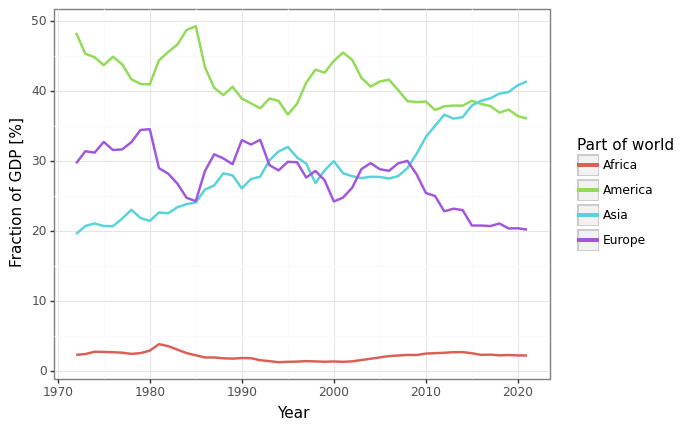

<ggplot: (129129879799)>

In [139]:
# Insert code here visual 1 
# Remember to print the visual 

gdp = pd.read_csv('GDP_tidy-1.csv')

p = (ggplot(gdp, aes(x='year', y = 'frac_gdp', color='part_of_world'))
+ geom_line(size=1)
+ theme_bw()
+ labs(x='Year', y='Fraction of GDP [%]', color='Part of world')
)
p

C:\Users\Admin\AppData\Local\Temp\ipykernel_7244\2692733833.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Admin\AppData\Local\Temp\ipykernel_7244\2692733833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp\ipykernel_7244\2692733833.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


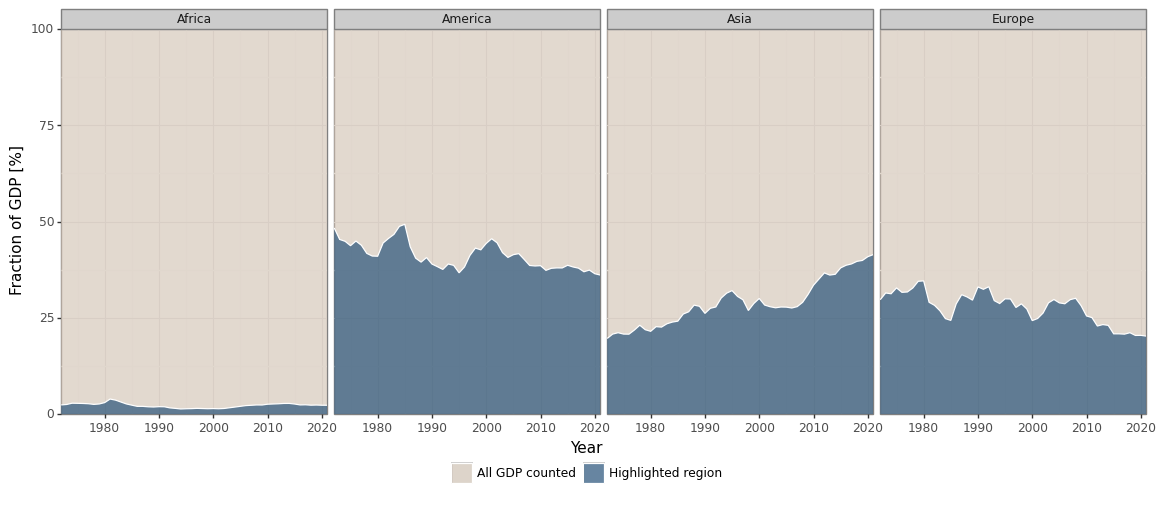

<ggplot: (129131875834)>

In [163]:
# Insert code here visual 2 
# Remember to print the visual 
gdp_aug = gdp.copy()

gdp_aug['highlight'] = 'Highlighted region'
gdp_aug = gdp_aug.append(gdp_aug)
gdp_aug['highlight'].iloc[200:] = 'All GDP counted'
gdp_aug['frac_gdp'].iloc[200:] = 100


col_highlight = ["#D0C0B0", "#0A3D6B", "#ECE9CD", "#0D5C3D", "#812F02"]

p = (ggplot(gdp_aug, aes(x='year', y = 'frac_gdp', fill='highlight'))
+ geom_density(stat='identity', alpha=0.6, color='White')
+ facet_wrap("~part_of_world", nrow=1)
+ scale_fill_manual(values=col_highlight, name=" ")
+ scale_y_continuous(expand=(0,0))
+ scale_x_continuous(expand=(0,0))
+ theme_bw()
+ labs(x='Year', y='Fraction of GDP [%]', color='Part of world')
+ theme(
    legend_position='bottom',
    figure_size=(14,5)
)
)
p

## Assocations 

For this part reading chapter 10-11 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 5.1 

Using the dataset with different indicators, such as life-happiness, perception of corruption etc..., compare two variables using a scatter plot. Briefly discuss the take-away from the visual. In the plot color the different continents.

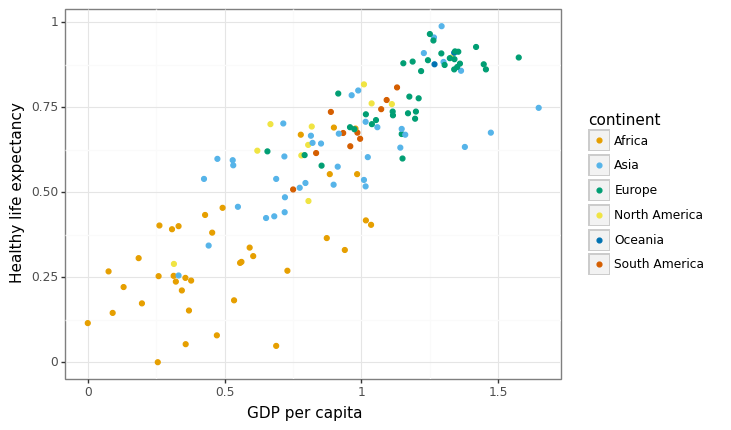

<ggplot: (129132670498)>

In [187]:
# Insert code here 
# Remember to print the visual 

world = pd.read_csv('World_2018-1.csv')

p = (ggplot(world, aes(x='GDP_per_capita', y='Healthy_life_expectancy', color='continent'))
+ geom_point()
+ scale_color_manual(values=cbPalette)
+ theme_bw()
+ labs(x='GDP per capita', y='Healthy life expectancy')
)
p

*Brief motivation*

From the visualization above we can take away that there is a positive correlation between GDP per capita and healthy life expectancy. We can also see that the data points are somewhat grouped together by continent, although some such as Africa are more spread out than others.

### Question 5.2 

Let us explore the dataset in question 5.1 a bit deeper. Choose five different variables and create a visual where we can clearly see the associations between all pair of variables. Briefly discuss the take-away from the visual. In the plot color the different continents.

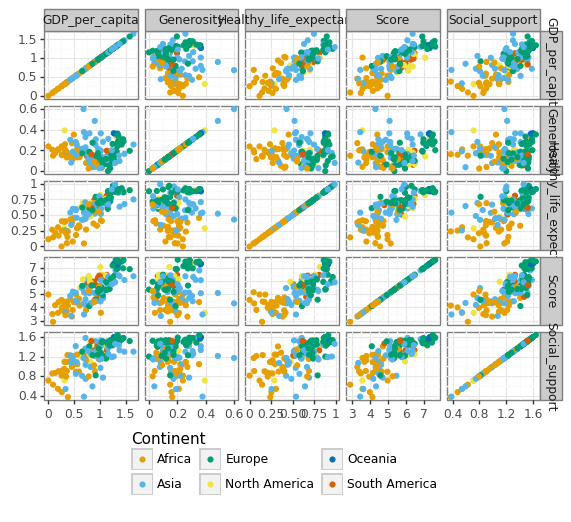

<ggplot: (129120248351)>

In [192]:
# Insert code here 
# Remember to print the visual 

var_plot = ["GDP_per_capita", "Score", "Generosity", "Healthy_life_expectancy", "Social_support"]
df_tmp1 = world[["name", "continent"] + var_plot]
df_tmp = df_tmp1.melt(id_vars=["name", "continent"], value_vars=var_plot, value_name="val_x", var_name="var_x") 
df_tmp = df_tmp.merge(df_tmp1)
df_plot = df_tmp.melt(id_vars=["name", "continent", "var_x", "val_x"], value_vars=var_plot, value_name="val_y", var_name="var_y")


p = (ggplot(df_plot, aes(x='val_x', y='val_y', color='continent'))
+ geom_point()
+ scale_color_manual(values=cbPalette, name='Continent')
+ facet_grid('var_y ~ var_x',
            scales='free')
+ labs(x="", y="")
+ theme_bw()
+ theme(
    legend_position="bottom",
    
)
)
p

*Brief motivation*

### Question 5.3 

Has the amount of $\mathrm{CO}_2$ released per person increased from 1970 to 2018 for a majority of countries, and if yes what magnitude of increase are we talking about? Use the $\mathrm{CO}_2$ on Canvas and create a visual which answers these questions.

In [18]:
# Insert code here 
# Remember to print the visual 